# Twitter Sentiment Analysis

## Importing Dataset

In [1]:
!kaggle datasets download -d kazanova/sentiment140 && unzip sentiment140.zip

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment140.zip
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
import pandas as pd
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

## Adding Column names

In [4]:
df.columns = ['Polarity', 'ID', 'Date', 'Flag', 'User', 'Text']
df.head()

,Polarity,ID,Date,Flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df = df.drop(columns=['Flag'])
df.head()

,Polarity,ID,Date,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


## Taking a Sample, as Dataset is Large

In [6]:
df_sample = df.sample(n=800000, random_state=42)
print(df_sample.head())
print(df_sample['Polarity'].value_counts()) # df_sample['Polarity'].map({0: 'negative', 4: 'positive'}) for mapping

        Polarity          ID                          Date            User  \
541200         0  2200003313  Tue Jun 16 18:18:13 PDT 2009   DEWGetMeTho77   
750            0  1467998601  Mon Apr 06 23:11:18 PDT 2009         Young_J   
766711         0  2300049112  Tue Jun 23 13:40:12 PDT 2009   dougnawoschik   
285055         0  1993474319  Mon Jun 01 10:26:09 PDT 2009        thireven   
705995         0  2256551006  Sat Jun 20 12:56:51 PDT 2009  taracollins086   

                                                     Text  
541200  @Nkluvr4eva My poor little dumpling  In Holmde...  
750     I'm off too bed. I gotta wake up hella early t...  
766711  I havent been able to listen to it yet  My spe...  
285055  now remembers why solving a relatively big equ...  
705995                           Ate too much, feel sick   
Polarity
0    400211
4    399789
Name: count, dtype: int64


In [7]:
df_sample.shape

(800000, 5)

## Replacing Polarity Column to Last

In [8]:
df_sample['Polarity'] = df_sample.pop('Polarity')
df_sample.head()

,ID,Date,User,Text,Polarity
541200,2200003313,Tue Jun 16 18:18:13 PDT 2009,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...,0
750,1467998601,Mon Apr 06 23:11:18 PDT 2009,Young_J,I'm off too bed. I gotta wake up hella early t...,0
766711,2300049112,Tue Jun 23 13:40:12 PDT 2009,dougnawoschik,I havent been able to listen to it yet My spe...,0
285055,1993474319,Mon Jun 01 10:26:09 PDT 2009,thireven,now remembers why solving a relatively big equ...,0
705995,2256551006,Sat Jun 20 12:56:51 PDT 2009,taracollins086,"Ate too much, feel sick",0


In [9]:
df_sample.isnull().sum()

,0
ID,0
Date,0
User,0
Text,0
Polarity,0


In [10]:
df_sample.shape

(800000, 5)

In [11]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800000 entries, 541200 to 977400
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ID        800000 non-null  int64 
 1   Date      800000 non-null  object
 2   User      800000 non-null  object
 3   Text      800000 non-null  object
 4   Polarity  800000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 36.6+ MB


## Cleaning the Text using Lemmatizer

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(text)

df_sample['Cleaned_Text'] = df_sample['Text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df_sample.head()

,ID,Date,User,Text,Polarity,Cleaned_Text
541200,2200003313,Tue Jun 16 18:18:13 PDT 2009,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...,0,poor little dumpling holmdel vids really tryin...
750,1467998601,Mon Apr 06 23:11:18 PDT 2009,Young_J,I'm off too bed. I gotta wake up hella early t...,0,im bed gotta wake hella early tomorrow morning
766711,2300049112,Tue Jun 23 13:40:12 PDT 2009,dougnawoschik,I havent been able to listen to it yet My spe...,0,havent able listen yet speaker busted
285055,1993474319,Mon Jun 01 10:26:09 PDT 2009,thireven,now remembers why solving a relatively big equ...,0,remembers solving relatively big equation two ...
705995,2256551006,Sat Jun 20 12:56:51 PDT 2009,taracollins086,"Ate too much, feel sick",0,ate much feel sick


## Vectorization using CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_sample['Cleaned_Text'])

## Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

y = df_sample['Polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classifying using MultinomialNB

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.76748125

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     79976
           4       0.78      0.75      0.76     80024

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



## Hyperparameter tuning using GridSearchCV

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Different values of alpha to try
}

nb_classifier = MultinomialNB()

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy after tuning:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'alpha': 5.0}
Test Accuracy after tuning: 0.76848125

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78     79976
           4       0.79      0.73      0.76     80024

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



## Vectorization using TF-IDF Vecotizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

y = df_sample['Polarity']
X = df_sample['Cleaned_Text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Classifying using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.77985625

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78     79976
           4       0.79      0.73      0.76     80024

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



## Confusion Matrix

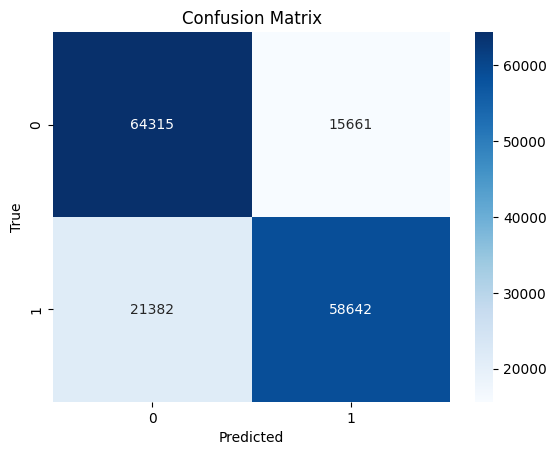

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Predicting with a Test Data

In [23]:
k = X_test.iloc[500]
print(y_test.iloc[500])
k_vectorized = tfidf.transform([k])

y_pred_lr = lr_model.predict(k_vectorized)
print(y_pred_lr)

if(y_pred_lr == 0):
  print("Negative Tweet")
else:
  print("Positive Tweet")

4
[4]
Positive Tweet
